# Importing Libraries/Reading in Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [5]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Combining Text/Creating Post Length

In [6]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [7]:
df['selftext'].fillna('', inplace=True)  
# fill with a blank string. Almost even split between nulls for each subreddit (already checked in title notebook)

In [8]:
df['post_text'] = df['title'] + ' ' + df['selftext']

In [12]:
length = []
for i in df['post_text']:
    length.append(len(i))
    
df['post_length'] = length

In [13]:
num_words = []
for i in df['post_text']:
    num_words.append(len(i.split()))

df['post_word_count'] = num_words

In [14]:
df.head()

,title,selftext,subreddit,created_utc,post_text,post_length,post_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,"Genreverse Hi everyone, \n\nHere at Genreverse...",409,58
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,Tomorrowland and it's bass line-up So obviousl...,655,109
2,Hand crafts 2021,,Tomorrowland,1636935255,Hand crafts 2021,17,3
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,Winter TML lodging hello! I have the 4 day pas...,353,68
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,Was Tomorrowland around the world 2020 a speci...,61,9


In [15]:
df.groupby('subreddit').mean()[['post_length', 'post_word_count']]

,post_length,post_word_count
subreddit,,
PremierLeague,244.275,39.092
Tomorrowland,245.422,41.666


**Tomorrowland posts are slightly longer than Premier League posts but not by much**

In [21]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['post_text'])
post_cvec = cvec.transform(df['post_text'])

In [22]:
post_words = pd.DataFrame(post_cvec.todense(), columns=cvec.get_feature_names())
post_words

,00,000,001,005,005056aa7581,007,00a,00s,01,02,...,čolak,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
post_words['which_sub'] = df['subreddit']

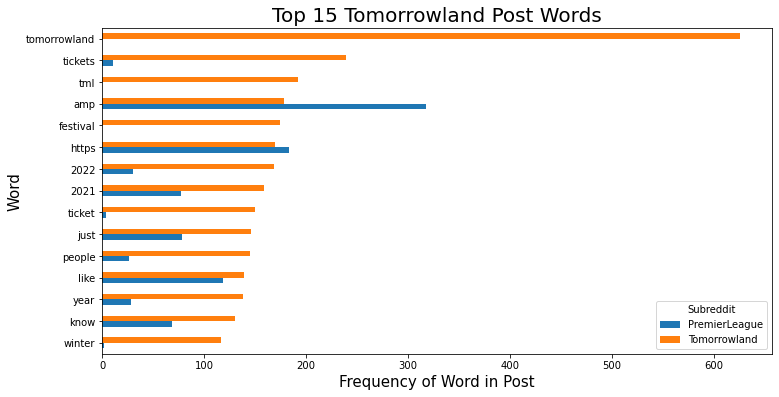

In [24]:
ax = post_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Post Words', size=20)
plt.xlabel('Frequency of Word in Post', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15tomo_selftext_words.png', bbox_inches='tight');
plt.show();

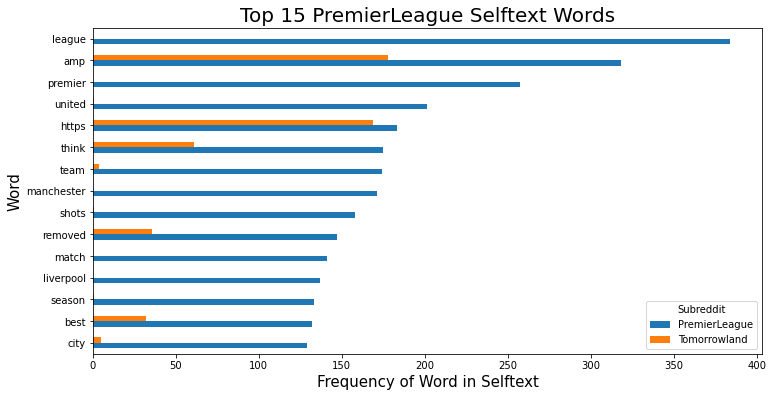

In [25]:
ax = post_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Selftext Words', size=20)
plt.xlabel('Frequency of Word in Selftext', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15prem_selftext_words.png', bbox_inches='tight');
plt.show();

In [26]:
posts_and_words = pd.merge(df, post_words, on=df.index)
posts_and_words.drop(columns='key_0', inplace=True)

In [27]:
posts_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,post_text,post_length,post_word_count,00,000,001,...,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,"Genreverse Hi everyone, \n\nHere at Genreverse...",409,58,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,Tomorrowland and it's bass line-up So obviousl...,655,109,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [29]:
prem_post_words = posts_and_words[posts_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'post_length', 'post_word_count',
                                                                                                    'which_sub', 'post_text'])
top15prem_post_words = prem_post_words.sum().sort_values(ascending=False).head(15)
top15prem_post_words

league        384
amp           318
premier       257
united        201
https         183
think         175
team          174
manchester    171
shots         158
removed       147
match         141
liverpool     137
season        133
best          132
city          129
dtype: int64

<BarContainer object of 15 artists>

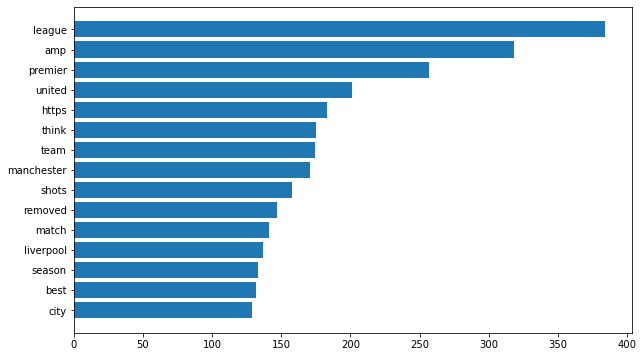

In [30]:
plt.figure(figsize=(10,6))
plt.barh(y=top15prem_post_words.sort_values().index, width=top15prem_post_words.sort_values())

In [31]:
tomo_post_words = posts_and_words[posts_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'post_length', 'post_word_count', 
                                                                                                   'which_sub', 'post_text'])
top15tomo_post_words = tomo_post_words.sum().sort_values(ascending=False).head(15)
top15tomo_post_words

tomorrowland    626
tickets         239
tml             192
amp             178
festival        174
https           169
2022            168
2021            159
ticket          150
just            146
people          145
like            139
year            138
know            130
winter          116
dtype: int64

<BarContainer object of 15 artists>

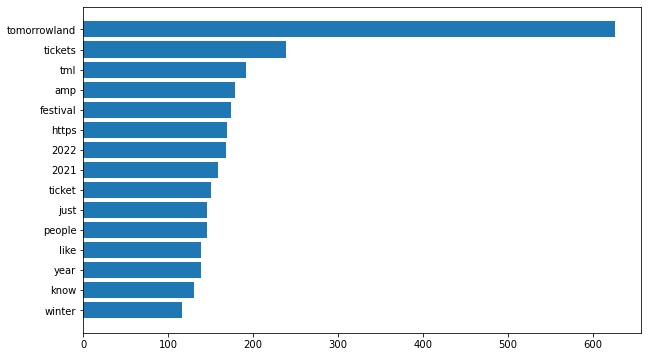

In [33]:
plt.figure(figsize=(10,6))
plt.barh(y=top15tomo_post_words.sort_values().index, width=top15tomo_post_words.sort_values())

---

# Models

### Model Preparation

In [34]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})

In [35]:
X = df['post_text']
y = df['subreddit']

In [36]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [38]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [39]:
params1 = {
    'cvec__min_df': [15, 16, 17],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [40]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.836


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 16,
 'cvec__stop_words': 'english',
 'knn__weights': 'distance'}

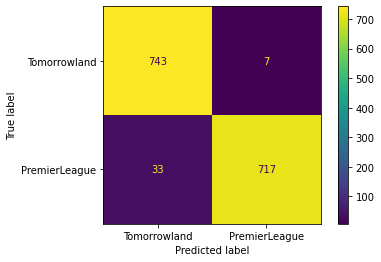

In [41]:
plot_confusion_matrix(gs1, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

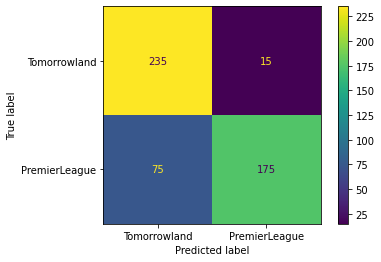

In [42]:
plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [46]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 1)].head(15)

106    I have created great content for your children...
475    Global Journey Easy Tent: Swap weekends using ...
553                      SOCIAL MEDIA MANAGING [removed]
491    Tomorrowland 2021 attendance poll Hello all! S...
562             KUMBH MELA WITH WATER BROTHERS [removed]
21     In light of the Astroworld tragedy, can we ple...
98                    Treasure Case TML Winter [removed]
880          Info request // swapping weekends [removed]
776    Classic house Listen to JayyeSpen mix classics...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
840    Anyone happen to record Kolsch &amp; Joris Voo...
565    Earn Free Amazon Gift Cards &amp; Codes Legall...
64     Best treasure case \n\n[View Poll](https://www...
418    Can I stay the entire week at dreamville? So I...
Name: post_text, dtype: object

---

### Model 2 - KNN with TFIDF

In [47]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [48]:
params2 = {
    'knn__n_neighbors': [4, 5, 6, 7],
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [22, 23, 24, 25, 26, 27],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [49]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.8460000000000001


{'knn__n_neighbors': 5,
 'tvec__max_df': 0.2,
 'tvec__min_df': 26,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

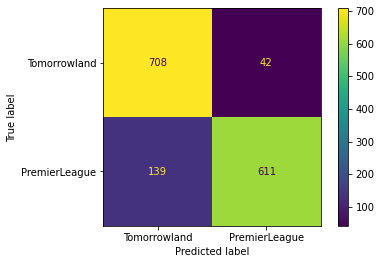

In [50]:
plot_confusion_matrix(gs2, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

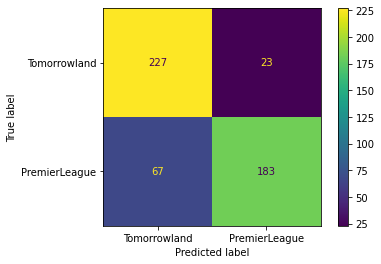

In [51]:
plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 3 - Logistic Regression with CountVectorizer

In [52]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [53]:
params3 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [54]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.9293333333333333


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

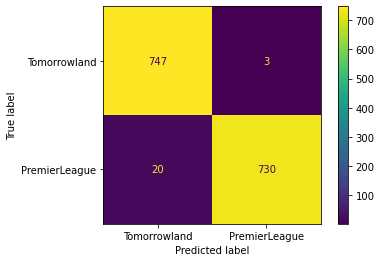

In [55]:
plot_confusion_matrix(gs3, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

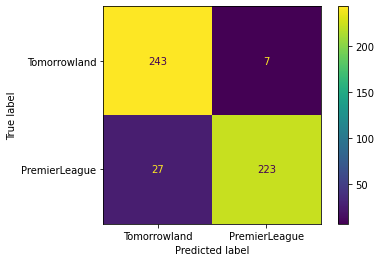

In [56]:
plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 4 - Logistic Regression with TFIDF

In [57]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [82]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [83]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.9366666666666668


{'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

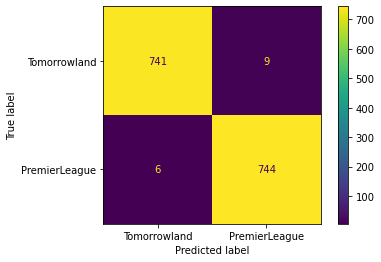

In [84]:
plot_confusion_matrix(gs4, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

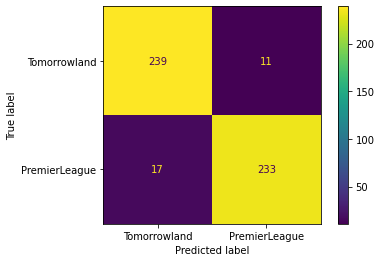

In [85]:
plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 5 - Decision Tree with CountVectorizer

In [62]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [86]:
params5 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'dt__random_state': [10],
    'dt__min_samples_split': [3, 4, 5, 6]
}

In [87]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.9033333333333333


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 1,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 5,
 'dt__random_state': 10}

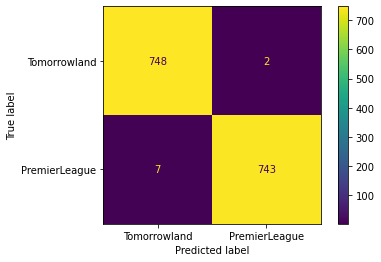

In [88]:
plot_confusion_matrix(gs5, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

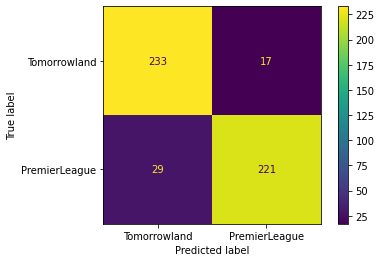

In [89]:
plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 6 - Decision Tree with TFIDF

In [102]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [109]:
params6 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'dt__random_state': [42],
    'dt__min_samples_split': [2, 3]
}

In [110]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.8993333333333332


{'dt__min_samples_split': 2,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

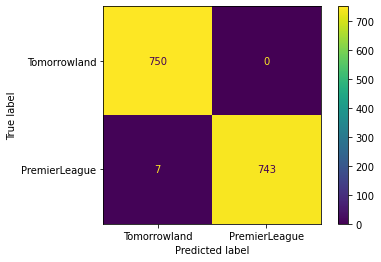

In [111]:
plot_confusion_matrix(gs6, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

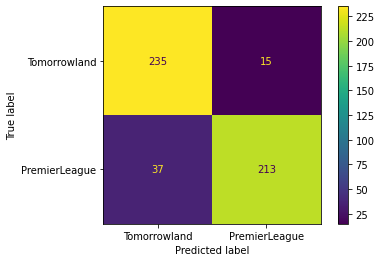

In [112]:
plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 7 - RandomForest with CountVectorizer

In [72]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [113]:
params7 = {
    'cvec__min_df': [3, 4, 5],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'rf__random_state': [42]
}

In [114]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.9199999999999999


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 4,
 'cvec__stop_words': None,
 'rf__random_state': 42}

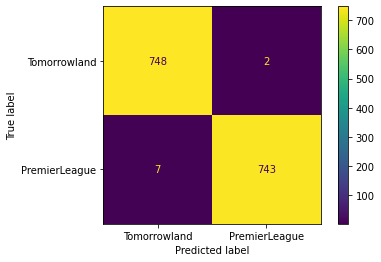

In [115]:
plot_confusion_matrix(gs7, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

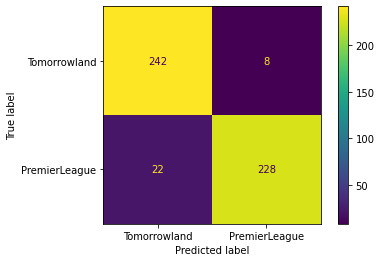

In [116]:
plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

---

### Model 8 - RandomForest with TFIDF

In [77]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [98]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [99]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.9226666666666666


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

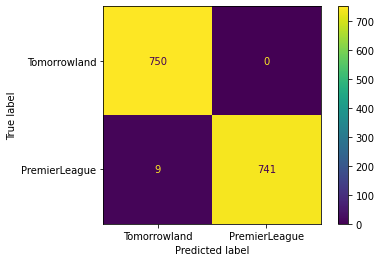

In [100]:
plot_confusion_matrix(gs8, X_train, y_train, display_labels=['Tomorrowland', 'PremierLeague'])

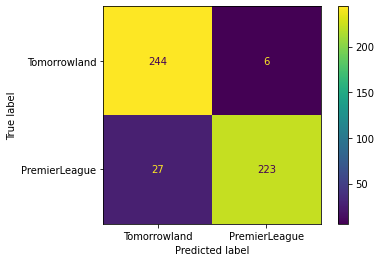

In [101]:
plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])